In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
red_wine = pd.read_csv("./data/winequality-red.csv", sep=';')
white_wine = pd.read_csv("./data/winequality-white.csv", sep=';')

In [3]:
# Display basic information
print("Red Wine Summary:")
print(red_wine.info())
print(red_wine.describe())

print("\nWhite Wine Summary:")
print(white_wine.info())
print(white_wine.describe())

Red Wine Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.

<Figure size 1200x500 with 0 Axes>

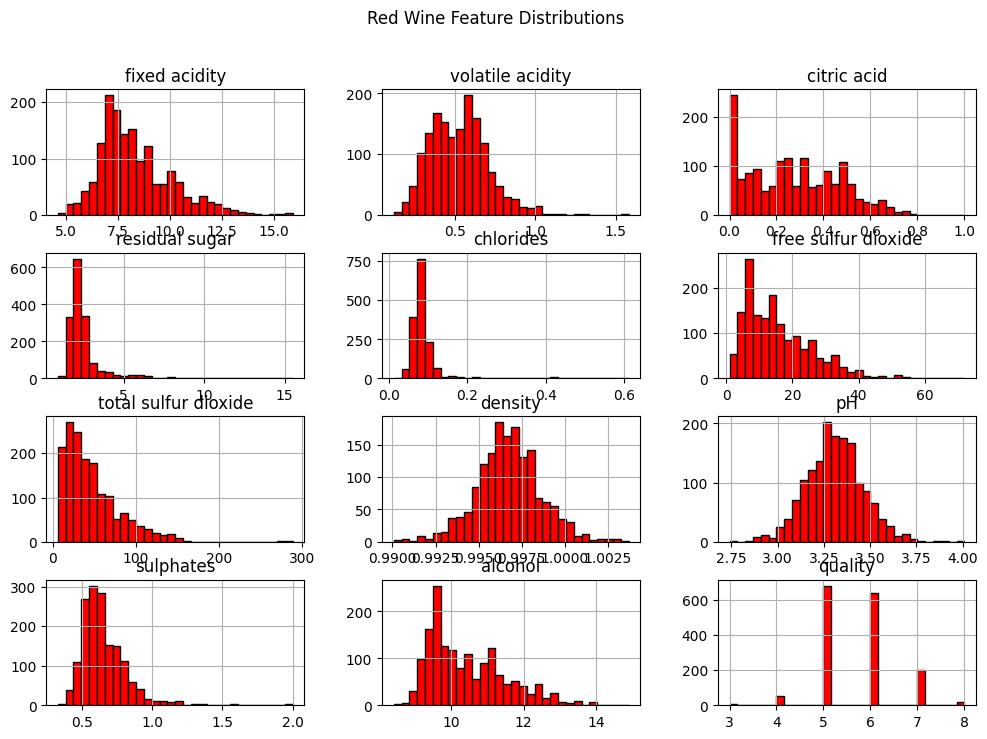

<Figure size 1200x500 with 0 Axes>

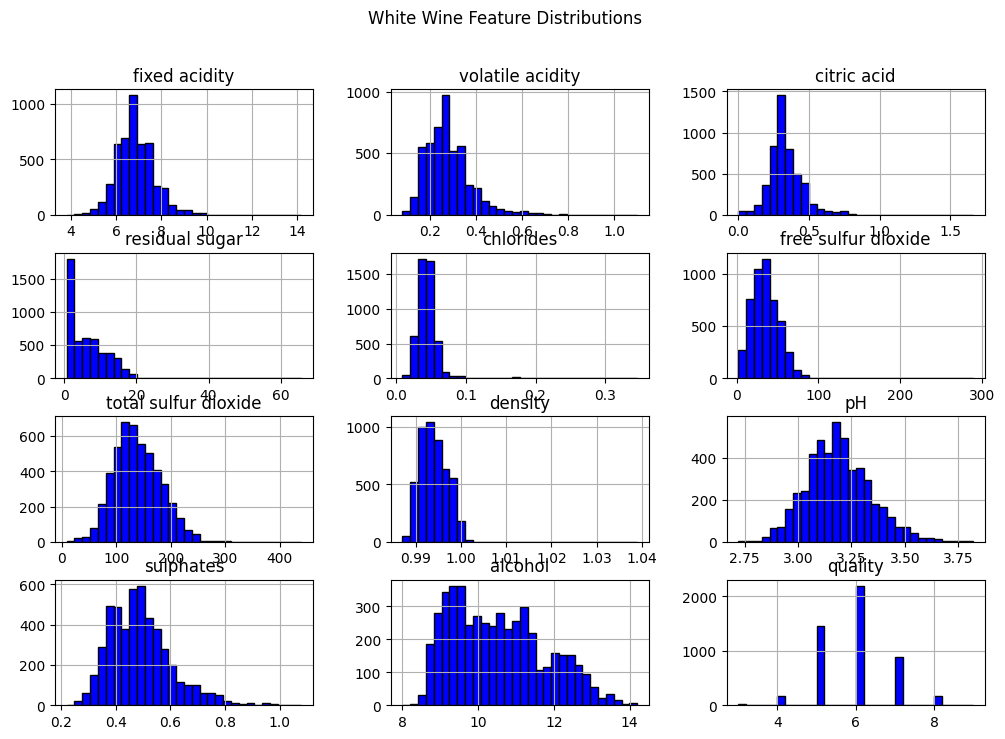

In [4]:
# Histogram for feature distributions
# RED
plt.figure(figsize=(12, 5))
red_wine.hist(bins=30, edgecolor='black', color='red', figsize=(12, 8))
plt.suptitle("Red Wine Feature Distributions")
plt.show()

# WHITE
plt.figure(figsize=(12, 5))
white_wine.hist(bins=30, edgecolor='black', color='blue', figsize=(12, 8))
plt.suptitle("White Wine Feature Distributions")
plt.show()

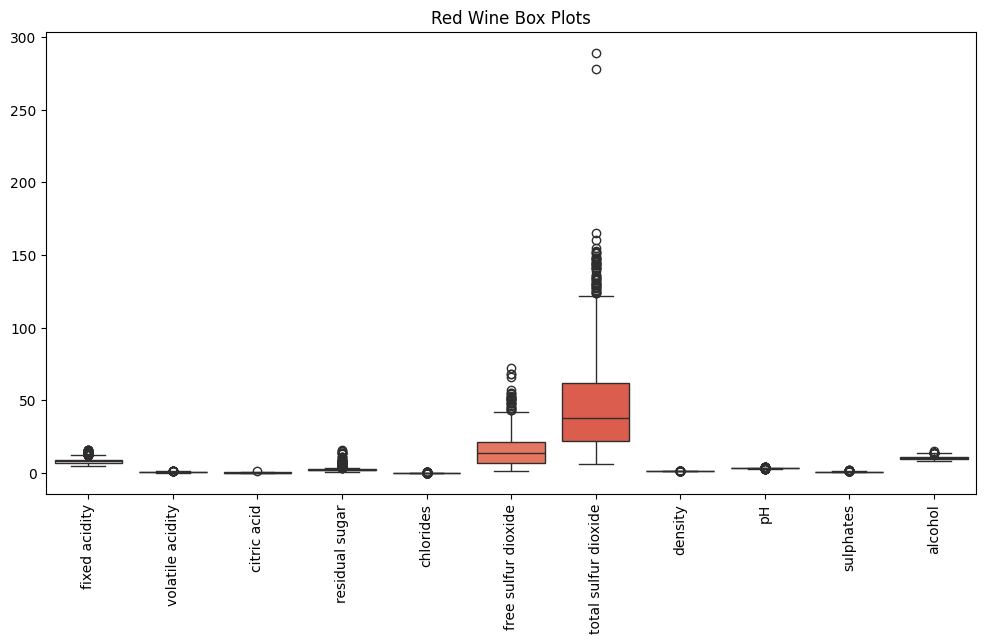

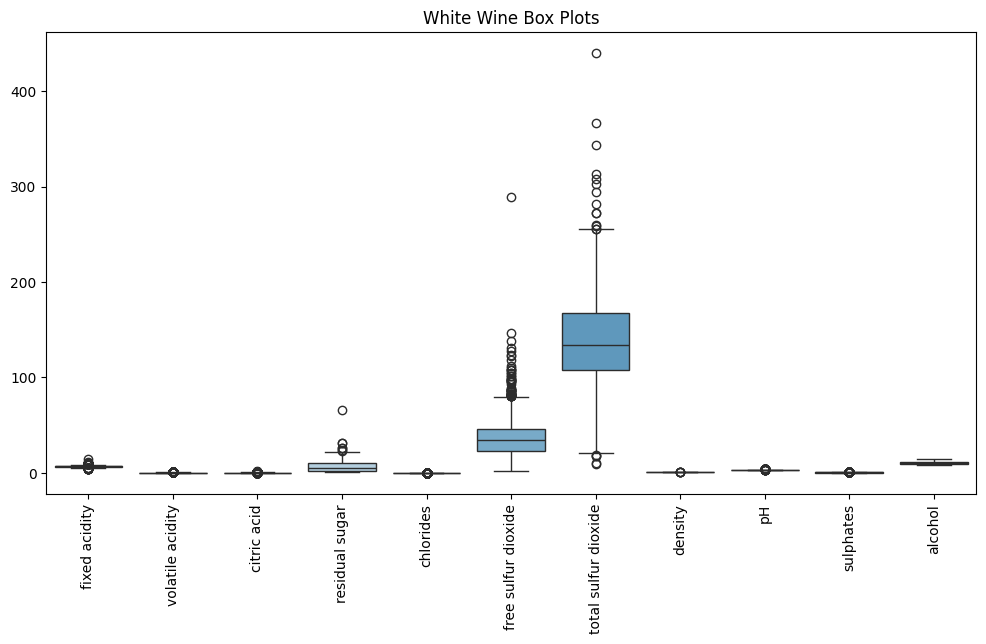

In [5]:
# Box plot for outlier detection
# RED
plt.figure(figsize=(12, 6))
sns.boxplot(data=red_wine.drop(columns=['quality']), palette='Reds')
plt.xticks(rotation=90)
plt.title("Red Wine Box Plots")
plt.show()

# WHITE
plt.figure(figsize=(12, 6))
sns.boxplot(data=white_wine.drop(columns=['quality']), palette='Blues')
plt.xticks(rotation=90)
plt.title("White Wine Box Plots")
plt.show()

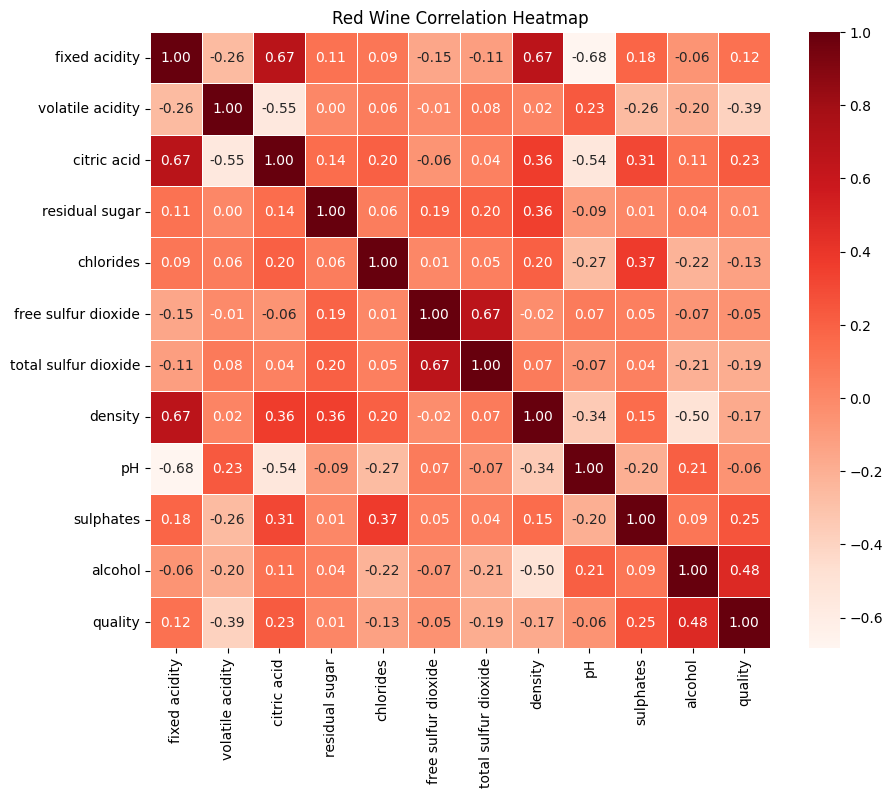

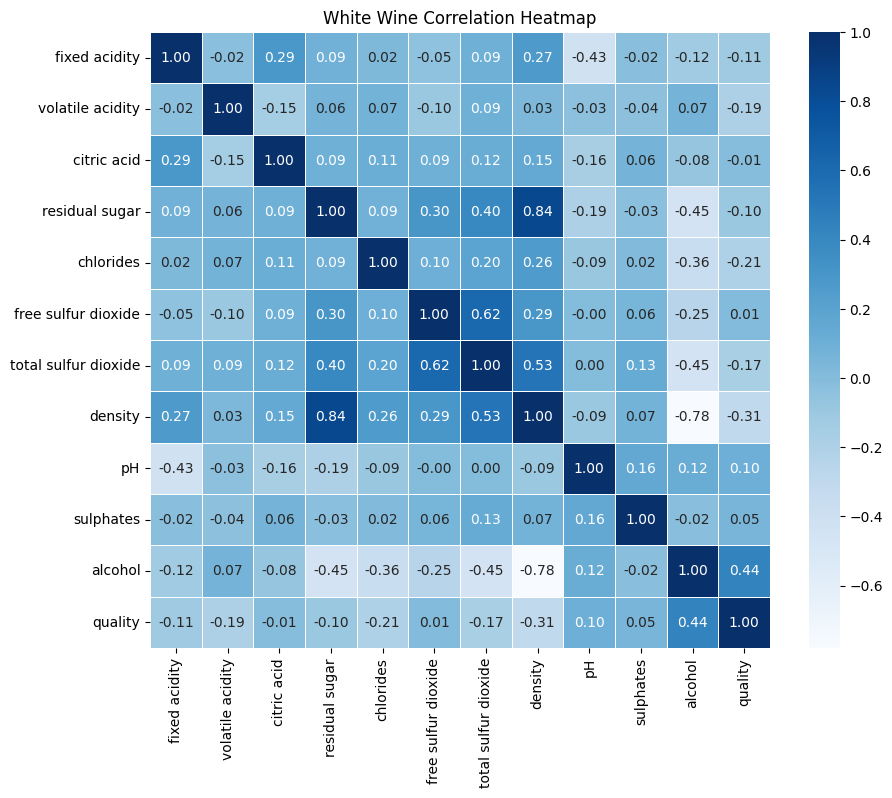

In [6]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(red_wine.corr(), annot=True, cmap='Reds', fmt='.2f', linewidths=0.5)
plt.title("Red Wine Correlation Heatmap")
plt.show()



# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(white_wine.corr(), annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title("White Wine Correlation Heatmap")
plt.show()

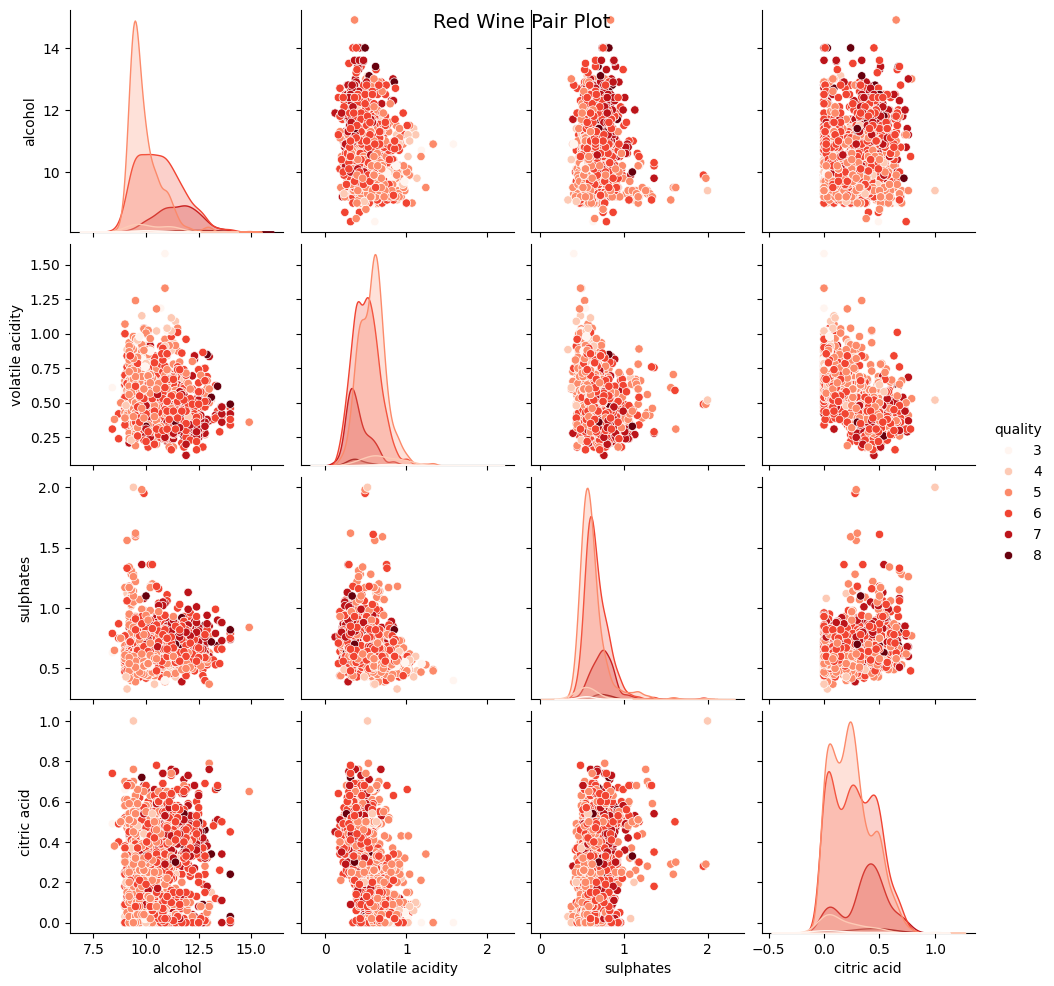

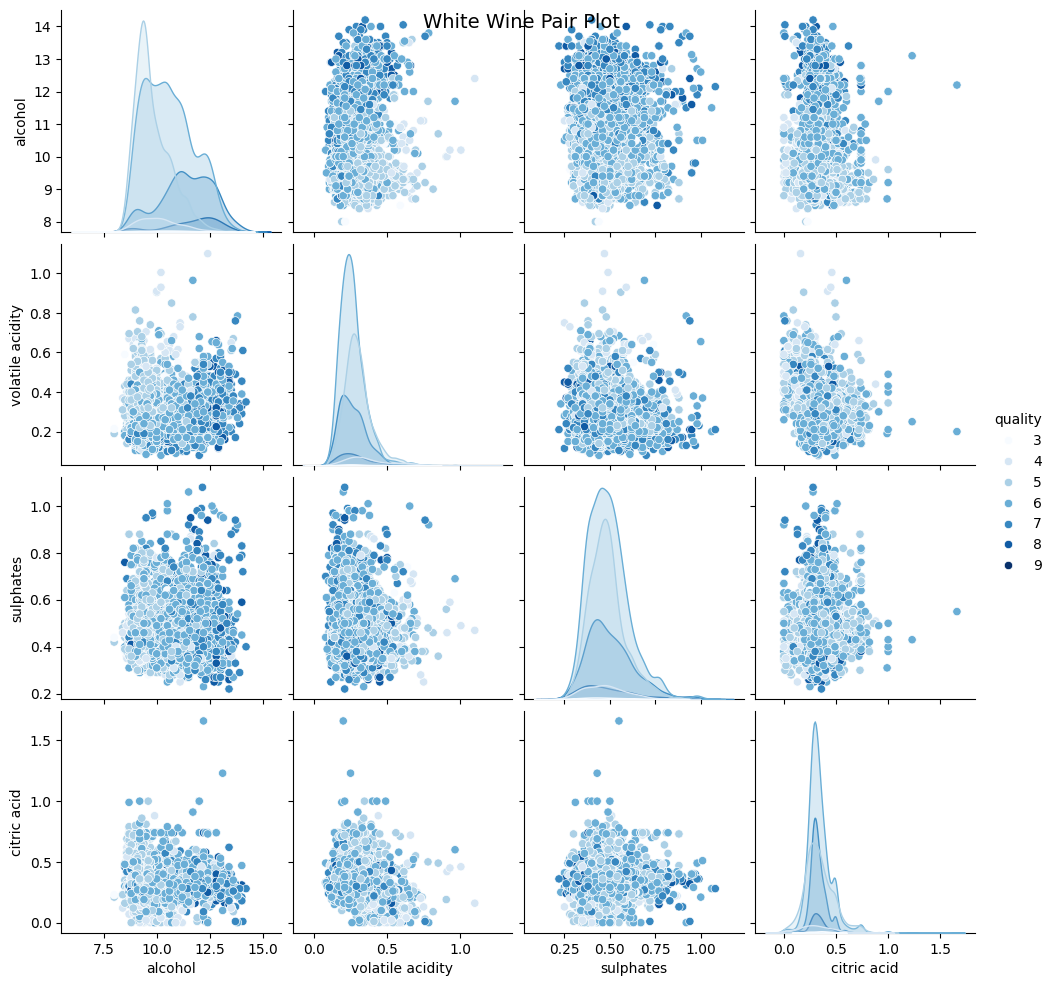

In [7]:
# Pair plots for selected features
#MOCK VALUE FOR SELECTED FEATURES FOR NOW
selected_features = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'quality']
sns.pairplot(red_wine[selected_features], hue='quality', palette='Reds')
plt.suptitle("Red Wine Pair Plot", fontsize=14)
plt.show()

sns.pairplot(white_wine[selected_features], hue='quality', palette='Blues')
plt.suptitle("White Wine Pair Plot", fontsize=14)
plt.show()